# Tiền sử lý dữ liệu

In [110]:
import numpy as np
import pandas as pd
df=pd.read_csv('Cancer_data.csv',sep=';')
df

,Patient.Code,Gender,Age,Raca.Color,Nationality,Degree.of.Education,State.Civil,Code.Profession,Status.Address,City.Address,...,Indicator.of.Rare.Case,Diagnostic.means,Extension,Laterality,Statement,TNM,Status.Vital,Type.of.Death,Date.of.Death,year
0,672054.0,2,30.0,1,11,6,0,516.0,SĂO PAULO,CAMPINAS,...,0.0,6,2,4,77,312,0,0,2005-10-07,2005.0
1,673213.0,0,53.0,5,78,6,5,0.0,SĂO PAULO,CAMPINAS,...,0.0,3,4,4,77,312,0,2,2007-01-30,2003.0
2,673396.0,0,51.0,3,11,6,2,0.0,SĂO PAULO,CAMPINAS,...,0.0,3,4,4,77,312,0,0,2005-07-03,2003.0
3,673425.0,0,73.0,5,78,6,5,0.0,SĂO PAULO,CAMPINAS,...,0.0,3,4,4,77,312,1,2,NaN,2003.0
4,673745.0,2,71.0,1,11,6,2,0.0,SĂO PAULO,CAMPINAS,...,0.0,6,4,4,77,312,0,0,2005-10-21,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992164,605577.0,0,57.0,5,78,6,5,0.0,SĂO PAULO,SĂO PAULO,...,NaN,3,4,4,77,312,2,2,NaN,2011.0
992165,653879.0,0,53.0,5,78,6,5,0.0,SĂO PAULO,SĂO PAULO,...,NaN,3,4,4,77,312,2,2,2011-07-12,2011.0
992166,636896.0,0,NaN,5,78,6,5,0.0,SĂO PAULO,SĂO PAULO,...,NaN,3,4,4,77,312,2,2,NaN,2011.0
992167,659796.0,0,52.0,5,78,6,5,0.0,SĂO PAULO,SĂO PAULO,...,NaN,3,4,4,77,312,2,2,NaN,2011.0


In [111]:
df.dtypes

Patient.Code                       float64
Gender                               int64
Age                                float64
Raca.Color                           int64
Nationality                          int64
Degree.of.Education                  int64
State.Civil                          int64
Code.Profession                    float64
Status.Address                      object
City.Address                        object
Description.of.Topography           object
Topography.Code                      int64
Morphology.Description              object
Code.of.Morphology                   int64
Description.of.Disease              object
Illness.Code                         int64
Child.Illness.Description           object
Child.Illness.Code                   int64
Youth.Adult.Illness.Description     object
Code.of.Disease.Adult.Young.         int64
Indicator.of.Rare.Case             float64
Diagnostic.means                     int64
Extension                            int64
Laterality 

In [112]:
df.isnull().sum()

Patient.Code                            0
Gender                                  0
Age                                 60524
Raca.Color                              0
Nationality                             0
Degree.of.Education                     0
State.Civil                             0
Code.Profession                     83976
Status.Address                        334
City.Address                            0
Description.of.Topography               0
Topography.Code                         0
Morphology.Description                  0
Code.of.Morphology                      0
Description.of.Disease                  0
Illness.Code                            0
Child.Illness.Description          484636
Child.Illness.Code                      0
Youth.Adult.Illness.Description    496678
Code.of.Disease.Adult.Young.            0
Indicator.of.Rare.Case             497100
Diagnostic.means                        0
Extension                               0
Laterality                        

In [113]:
df=df.drop(['Patient.Code','Age','Indicator.of.Rare.Case',
         'Nationality',
         'Degree.of.Education',
         'State.Civil',
         'Code.Profession',
         'Status.Address',
         'City.Address',
         'Description.of.Topography',
         'Morphology.Description',
         'Description.of.Disease',
         'Child.Illness.Description',
         'Youth.Adult.Illness.Description',
         'Status.Vital',
         'Date.of.Death',
         'year'
         ], axis=1)
df.isnull().sum()

Gender                          0
Raca.Color                      0
Topography.Code                 0
Code.of.Morphology              0
Illness.Code                    0
Child.Illness.Code              0
Code.of.Disease.Adult.Young.    0
Diagnostic.means                0
Extension                       0
Laterality                      0
Statement                       0
TNM                             0
Type.of.Death                   0
dtype: int64

In [114]:
df = df[df["Type.of.Death"] != 1]


In [115]:
# target class count
df["Type.of.Death"].value_counts()

2    784062
0    194341
Name: Type.of.Death, dtype: int64

In [116]:
# feature variables
x= df.iloc[:, :-1]

# target variable
y= df.iloc[:, -1]

In [117]:
from sklearn.feature_selection import mutual_info_classif
# Tính độ ảnh hưởng của các biến feature bằng mutual information
feature_scores = pd.Series(mutual_info_classif(x ,y), index=x.columns).sort_values(ascending=False)

# In ra kết quả
print(feature_scores)

Diagnostic.means                0.201582
Statement                       0.193769
Code.of.Disease.Adult.Young.    0.192241
TNM                             0.187556
Laterality                      0.165062
Child.Illness.Code              0.157419
Extension                       0.148024
Raca.Color                      0.144598
Code.of.Morphology              0.106333
Gender                          0.064123
Topography.Code                 0.061981
Illness.Code                    0.052367
dtype: float64


In [118]:
# loại bỏ các biến feature có độ ảnh hưởng thấp
x=x.drop(['Illness.Code', 'Topography.Code', 'Gender', 'Code.of.Morphology', 'Raca.Color','Extension'], axis=1)
df=df.drop(['Illness.Code', 'Topography.Code', 'Gender', 'Code.of.Morphology', 'Raca.Color','Extension'], axis=1)


<Axes: >

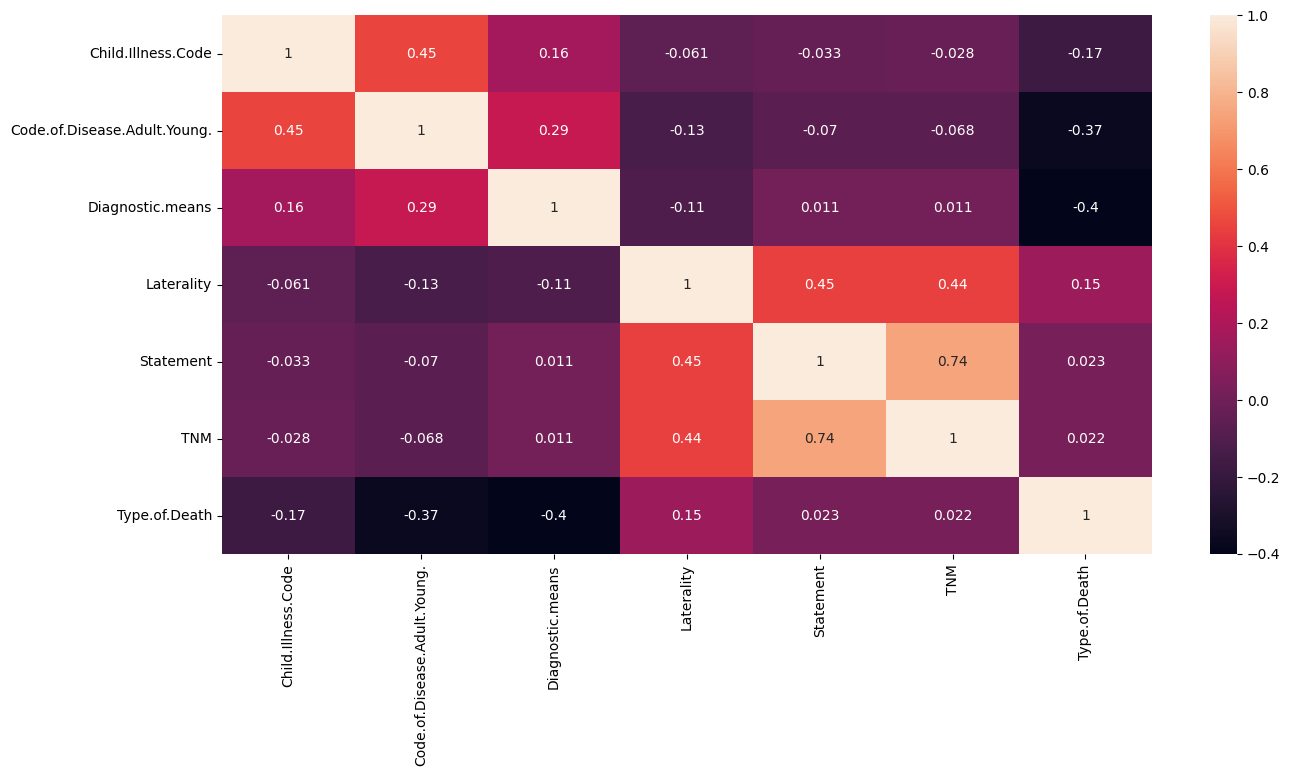

In [119]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

In [120]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline

# # Khởi tạo SMOTE và RandomUnderSampler
# over_sampler = SMOTE(sampling_strategy={1: int(1.5 * 13766)})
# under_sampler = RandomUnderSampler(sampling_strategy={ 2: int(1.5 * 13766 * 2)})

# # Tạo pipeline để kết hợp over-sampling và under-sampling
# pipeline = Pipeline([('over', over_sampler), ('under', under_sampler)])

# # Thực hiện xử lý mất cân bằng dữ liệu
# x_resampled, y_resampled = pipeline.fit_resample(x, y)


In [121]:
from imblearn.over_sampling import SMOTE

# Khởi tạo SMOTE
smote = SMOTE()

# Áp dụng SMOTE lên dữ liệu
x_resampled, y_resampled = smote.fit_resample(x, y)

# In số lượng mẫu của mỗi lớp sau khi áp dụng SMOTE
print(y_resampled.value_counts())

0    784062
2    784062
Name: Type.of.Death, dtype: int64


In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Random Forest

In [123]:
from sklearn.metrics import classification_report
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [124]:
from sklearn.ensemble import RandomForestClassifier
# Khởi tạo mô hình Random Forest với 100 cây quyết định
rf = RandomForestClassifier(n_estimators=100)

In [125]:
# Huấn luyện mô hình trên tập huấn luyện
rf.fit(x_train, y_train)

# Predict on the test set results

y_pred = rf.predict(x_test)
print_score(rf, x_train, y_train, x_test, y_test, train=True)
print_score(rf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 82.06%
_______________________________________________
CLASSIFICATION REPORT:
                       0              2  accuracy     macro avg  weighted avg
precision       0.740332       0.981038  0.820614  8.606848e-01  8.607490e-01
recall          0.987344       0.654062  0.820614  8.207033e-01  8.206144e-01
f1-score        0.846180       0.784857  0.820614  8.155184e-01  8.155021e-01
support    626915.000000  627584.000000  0.820614  1.254499e+06  1.254499e+06
_______________________________________________
Confusion Matrix: 
 [[618981   7934]
 [217105 410479]]

Test Result:
Accuracy Score: 81.93%
_______________________________________________
CLASSIFICATION REPORT:
                       0              2  accuracy      macro avg  \
precision       0.739588       0.980189  0.819319       0.859889   
recall          0.986898       0.651024  0.819319       0.818961   
f1-score        0.845530       0.782395  0.819319       0.813963   
support    157147.0

In [126]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85    157147
           2       0.98      0.65      0.78    156478

    accuracy                           0.82    313625
   macro avg       0.86      0.82      0.81    313625
weighted avg       0.86      0.82      0.81    313625



In [127]:
# độ ảnh hưởng của các biến feature

feature_scores = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores

Child.Illness.Code              0.479360
Code.of.Disease.Adult.Young.    0.307779
Diagnostic.means                0.188694
Laterality                      0.011136
Statement                       0.006889
TNM                             0.006141
dtype: float64

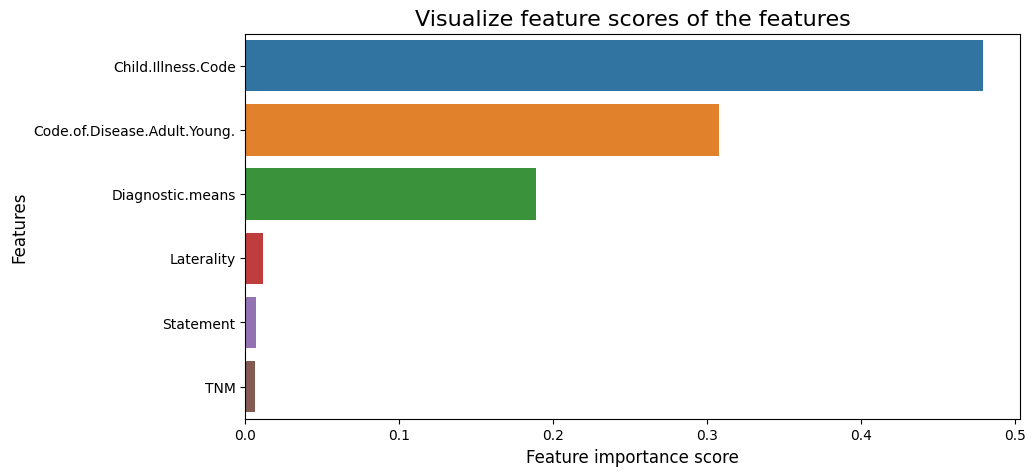

In [128]:
#Vẽ mô hình độ ảnh hưởng của các biến
# Định nghĩa kích thước của biểu đồ
plt.figure(figsize=(10, 5))
# Vẽ biểu đồ bar plot
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
# Đặt tiêu đề cho biểu đồ
ax.set_title("Visualize feature scores of the features", fontsize=16)
# Đặt nhãn trục y cho biểu đồ
ax.set_yticklabels(feature_scores.index)
# Đặt nhãn cho trục x
ax.set_xlabel("Feature importance score", fontsize=12)
# Đặt nhãn cho trục y
ax.set_ylabel("Features", fontsize=12)
# Hiển thị biểu đồ
plt.show()

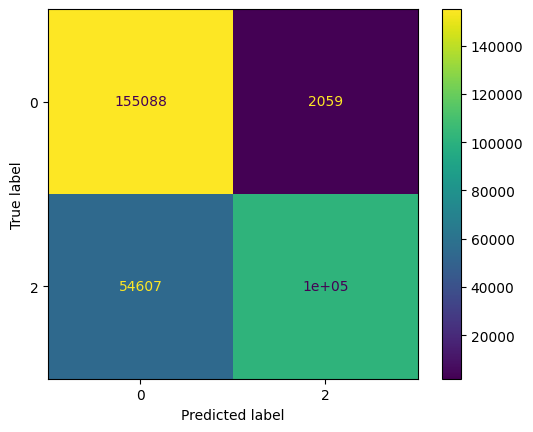

In [129]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

# Navie Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train, y_train)

# Predict Output
predicted = model.predict(x_test)

print("Actual Value:")
print("Predicted Value:", predicted)
accuray = accuracy_score(predicted, y_test)
f1 = f1_score(predicted, y_test, average="weighted")
print("Accuracy:", accuray)
print("F1 Score:", f1)

Actual Value:
Predicted Value: [0 0 0 ... 0 0 2]
Accuracy: 0.7934507772020726
F1 Score: 0.7995323083902258


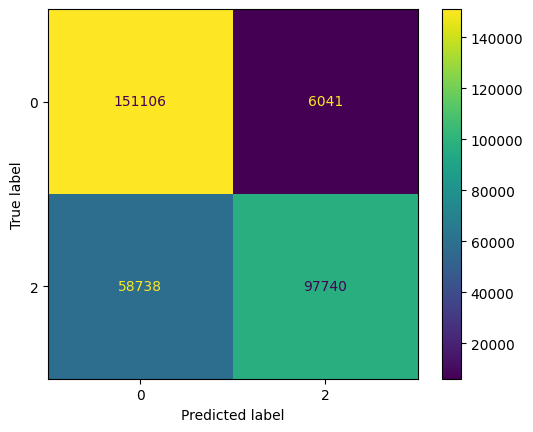

In [131]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, predicted)

# Hiển thị ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

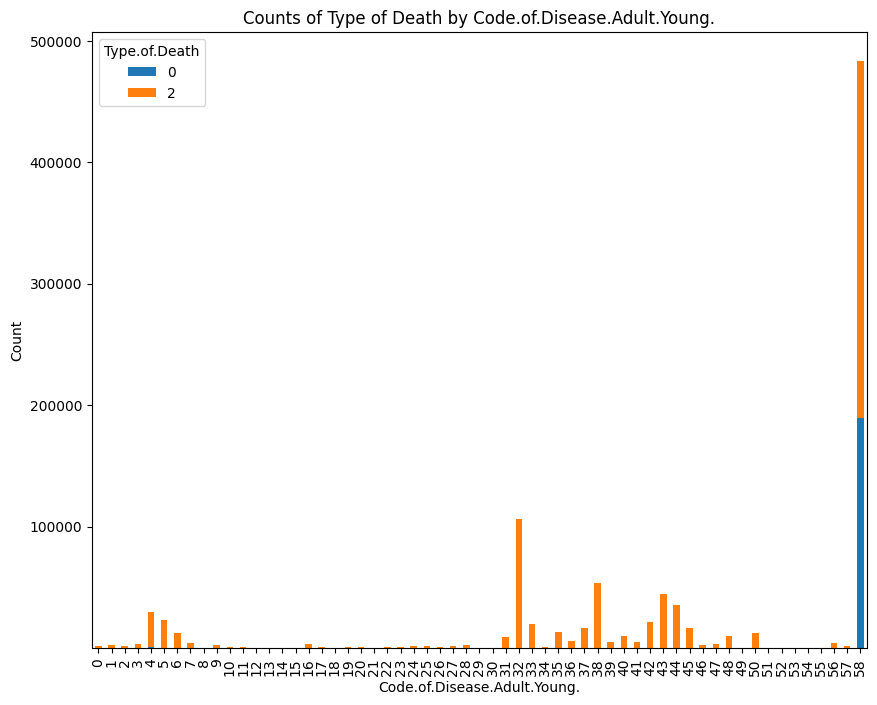

In [132]:
import matplotlib.pyplot as plt

counts = df.groupby('Code.of.Disease.Adult.Young.')['Type.of.Death'].value_counts()
counts = counts.unstack()
counts.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel('Code.of.Disease.Adult.Young.')
plt.ylabel('Count')
plt.title('Counts of Type of Death by Code.of.Disease.Adult.Young.')
plt.show()


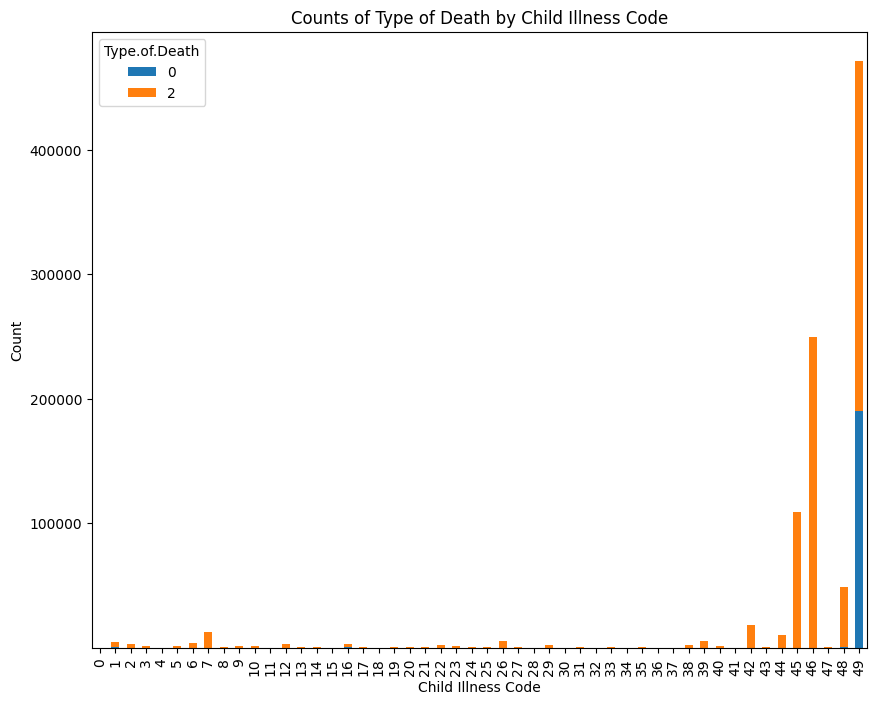

In [133]:
counts = df.groupby('Child.Illness.Code')['Type.of.Death'].value_counts()
counts = counts.unstack()
counts.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.xlabel('Child Illness Code')
plt.ylabel('Count')
plt.title('Counts of Type of Death by Child Illness Code')
plt.show()

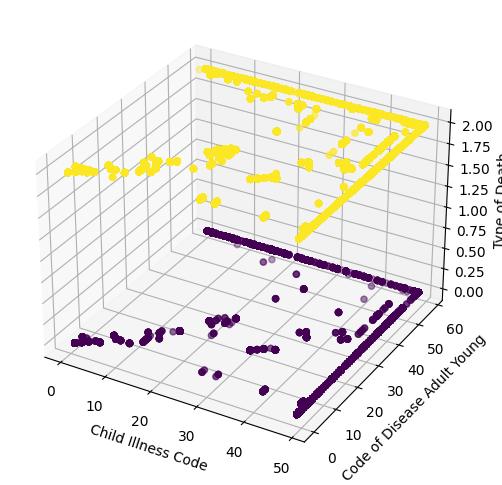

In [135]:
import matplotlib.pyplot as plt

# Lấy các giá trị của các thuộc tính
x = df['Child.Illness.Code']
y = df['Code.of.Disease.Adult.Young.']
z = df['Type.of.Death']

# Vẽ biểu đồ scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis')
ax.set_xlabel('Child Illness Code')
ax.set_ylabel('Code of Disease Adult Young')
ax.set_zlabel('Type of Death')
plt.show()